In [1]:
from sympy import *
def bvp(x_0: float, y_0: float, x_n: float, y_n: float, F: function):
    x = Symbol('x')
    y = Function('y')(x)
    F = F(x)
    ode = Eq(y.diff(x, 2) + F * y, 0)
    ics = {
        y.subs(x, x_0): y_0,
        y.subs(x, x_n): y_n,
    }
    Y = dsolve(ode, y, ics=ics).rhs.evalf()
    return {'x': x, 'y': y}, {'Y': Y, 'F': F}

In [2]:
import numpy as np
dtype = np.float32
def to_arrays(xlim: dict, x: Symbol, y: Function, Y: Function, F: Function):
    x_0, x_n = xlim['x_0'], xlim['x_n']
    n = (x_n - x_0) * 10
    aX = np.linspace(x_0, x_n, n, dtype=dtype)
    aY = np.array([Y.subs(x, i).evalf() for i in aX], dtype=dtype)
    aF = np.array([F.subs(x, i).evalf() for i in aX], dtype=dtype)
    arrays = {'Y(x)': np.array([aX, aY]), 'F(x)': np.array([aX, aF])}
    return arrays

In [3]:
import matplotlib.pyplot as plt
def plot(xlim: dict, arrays: dict):
    fig = plt.figure(figsize=(17, 7))
    ax = fig.gca()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim([xlim['x_0'], xlim['x_n']])
    ax.grid()
    for label, value in arrays.items():
        ax.plot(*value, label=label)
    ax.legend()
    return fig

In [4]:
xlim = {'x_0': 0, 'x_n': 15}
conditions = {
    'y_0': 1, 'y_n': 1,
    'F': lambda x: -1 + 2 * x,
}
conditions.update(xlim)
variables, functions = bvp(**conditions)
functions['Y'].subs(variables['x'], 2).evalf()

1.97163924964119

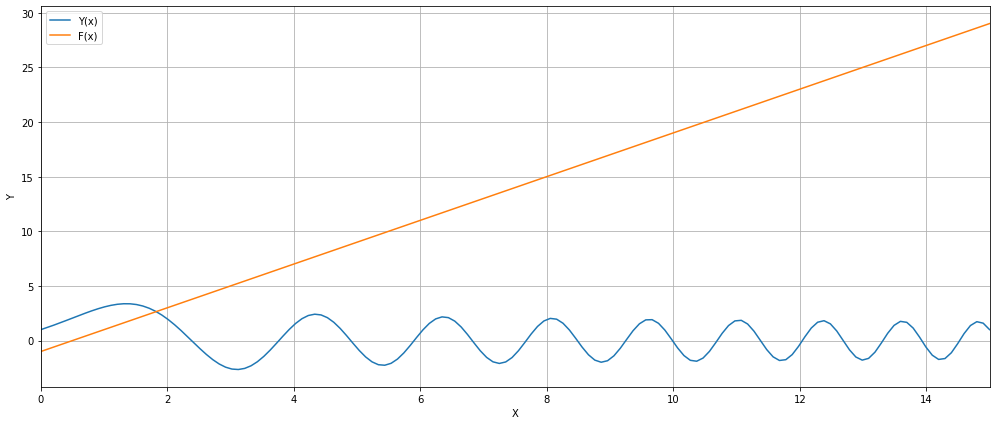

In [5]:
arrays = to_arrays(xlim, **variables, **functions)
fig = plot(xlim, arrays)

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm

def iter_samples():
    np.random.seed(0)
    n_samples = 1000
    B = np.linspace(-500 * np.pi, 500 * np.pi, n_samples)
    xlim = {'x_0': 0, 'x_n': 10}
    for i in tqdm(range(n_samples)):
        conditions = {
            'kind': 1,
            'y_0': 1, 'y_n': 2,
            'G': lambda x: 0 * x,
        }
        conditions.update(xlim)
        # A, B = koef[i]
        conditions['F'] = lambda x: B[i] * x
        yield i, conditions

def save_sample(args):
    i, conditions = args
    print(i)
    # variables, functions = bvp(**conditions)
    # print(f'{i} - solved:', functions['Y'].subs(variables['x'], 2).evalf())
    # arrays = to_arrays(xlim, **variables, **functions)
    # inputs = arrays['Y(x)'][1]
    # targets = arrays['F(x)'][1]
    # samples = np.vstack((inputs, targets))
    # fname = f'dataset/{i}_sample.'
    # np.save(fname + 'npy', samples)
    # fig = plot(xlim, arrays)
    # fig.savefig(fname + 'png')
    # print(f'{i} - saved!')

with Pool(3) as pool:
    pool.map(save_sample, iter_samples())